In [14]:
import xarray as xr
import numpy as np

In [7]:
filename_nc = '../../data/input/Peru/Peru_stake.nc'
ds = xr.open_dataset(filename_nc)
ds

<xarray.Dataset>
Dimensions:     (lat: 18, lon: 18, time: 8760)
Coordinates:
  * lon         (lon) float64 -77.64 -77.64 -77.64 ... -77.63 -77.63 -77.63
  * lat         (lat) float64 -8.966 -8.966 -8.965 ... -8.966 -8.967 -8.967
  * time        (time) datetime64[ns] 2016-09-01 ... 2017-08-31T23:00:00
Data variables:
    HGT         (lat, lon) float64 ...
    ASPECT      (lat, lon) float64 ...
    SLOPE       (lat, lon) float64 ...
    MASK        (lat, lon) float64 ...
    ALBEDO_G    (lat, lon) float64 ...
    ALBEDO_ICE  (lat, lon) float64 ...
    SNOWHEIGHT  (lat, lon) float64 ...
    T2          (time, lat, lon) float64 ...
    RH2         (time, lat, lon) float64 ...
    U2          (time, lat, lon) float64 ...
    G           (time, lat, lon) float64 ...
    PRES        (time, lat, lon) float64 ...
    RRR         (time, lat, lon) float64 ...
    N           (time, lat, lon) float64 ...

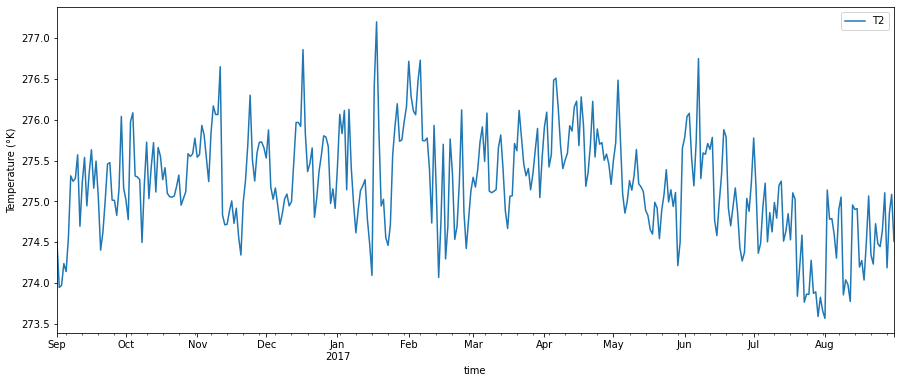

In [6]:
var = ds['T2'].where(ds['MASK']==1).resample(time='1D').mean('time')
df = var.mean('lon').mean('lat').to_dataframe()
fig = df.plot(figsize = (15,6)).set_ylabel('Temperature (°K)').get_figure()

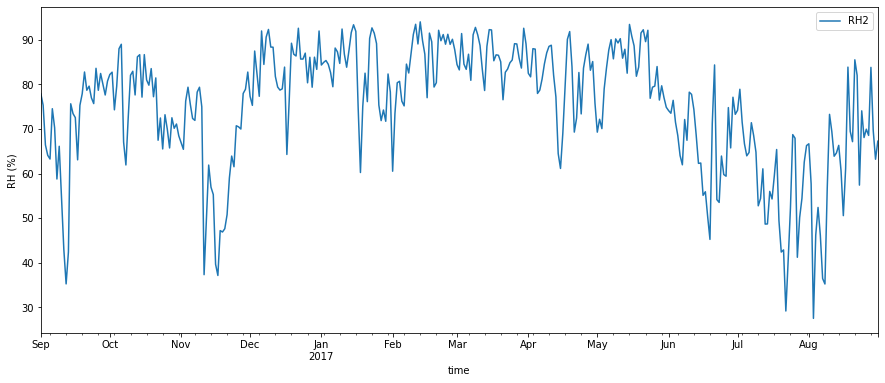

In [8]:
var = ds['RH2'].where(ds['MASK']==1).resample(time='1D').mean('time')
df = var.mean('lon').mean('lat').to_dataframe()
fig = df.plot(figsize = (15,6)).set_ylabel('RH (%)').get_figure()

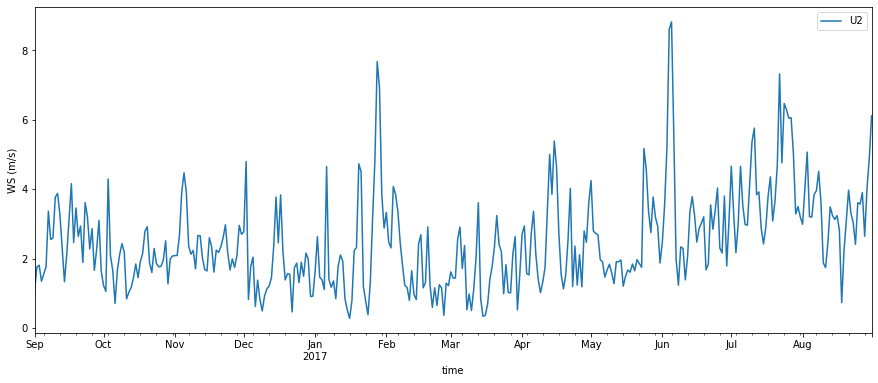

In [10]:
var = ds['U2'].where(ds['MASK']==1).resample(time='1D').mean('time')
df = var.mean('lon').mean('lat').to_dataframe()
fig = df.plot(figsize = (15,6)).set_ylabel('WS (m/s)').get_figure()

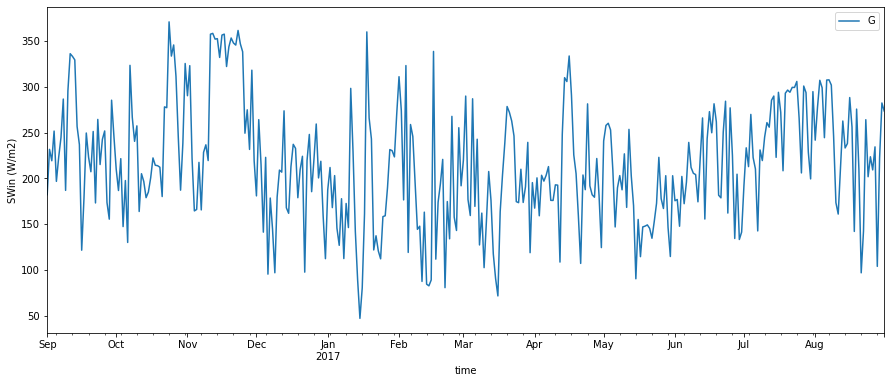

In [11]:
var = ds['G'].where(ds['MASK']==1).resample(time='1D').mean('time')
df = var.mean('lon').mean('lat').to_dataframe()
fig = df.plot(figsize = (15,6)).set_ylabel('SWin (W/m2)').get_figure()

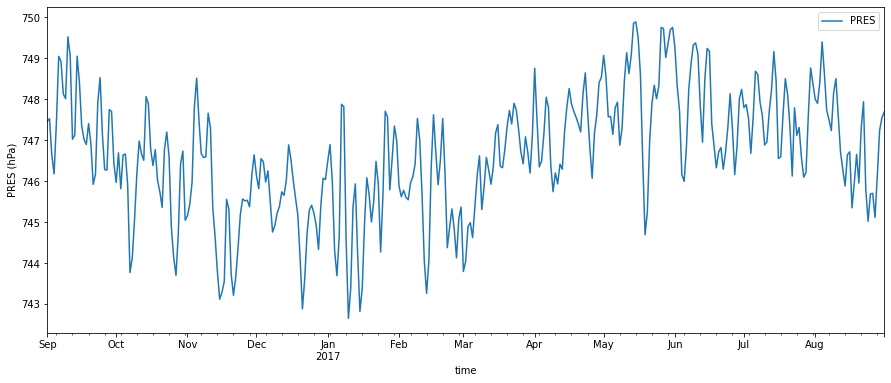

In [12]:
var = ds['PRES'].where(ds['MASK']==1).resample(time='1D').mean('time')
df = var.mean('lon').mean('lat').to_dataframe()
fig = df.plot(figsize = (15,6)).set_ylabel('PRES (hPa)').get_figure()

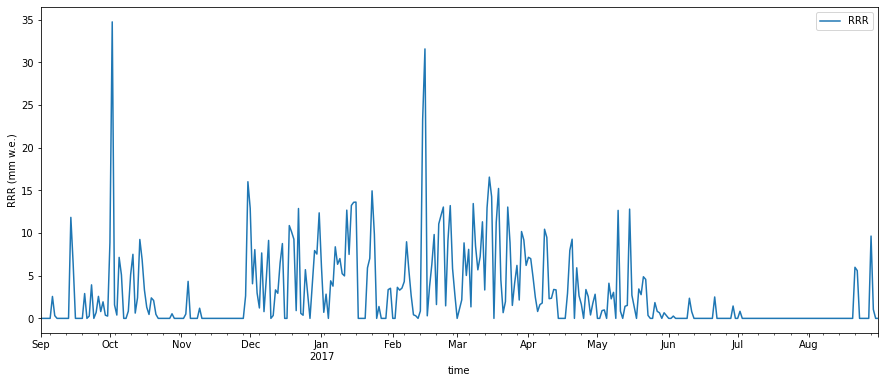

In [15]:
TOTAL_P = ds['RRR'].where(ds['MASK']==1).resample(time='1D').sum('time')
df = TOTAL_P.mean('lon').mean('lat').to_dataframe()
TOTAL_PT = []
for t in range(len(df)):
    TOTAL_PT.append(np.diagonal(TOTAL_P[t].values).mean())
df['RRR'] = TOTAL_PT
fig = df.plot(figsize = (15,6)).set_ylabel('RRR (mm w.e.)').get_figure()

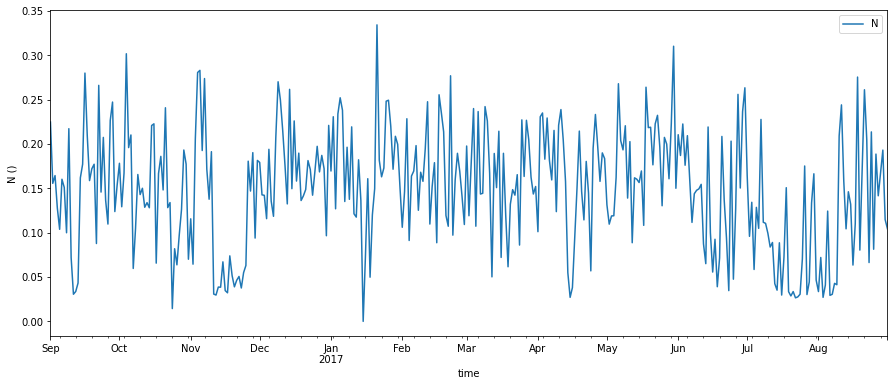

In [16]:
var = ds['N'].where(ds['MASK']==1).resample(time='1D').mean('time')
df = var.mean('lon').mean('lat').to_dataframe()
fig = df.plot(figsize = (15,6)).set_ylabel('N ()').get_figure()